Install and Import Dependencies

The provided link, "https://pytorch.org/get-started/locally/", directs users to the official PyTorch website, where they can find information and resources related to installing PyTorch locally on their machines.


In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# Install all required libraries
!cd yolov5 & pip install -r requirements.txt

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import webbrowser

Load Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Make Detections with Images

In [6]:
image = r'C:/Users/DELL/Downloads/desk.jpg'

In [7]:
results = model(image)
results.print()

image 1/1: 2796x4194 1 chair, 3 potted plants, 1 laptop, 1 keyboard, 3 vases
Speed: 320.7ms pre-process, 285.0ms inference, 18.2ms NMS per image at shape (1, 3, 448, 640)


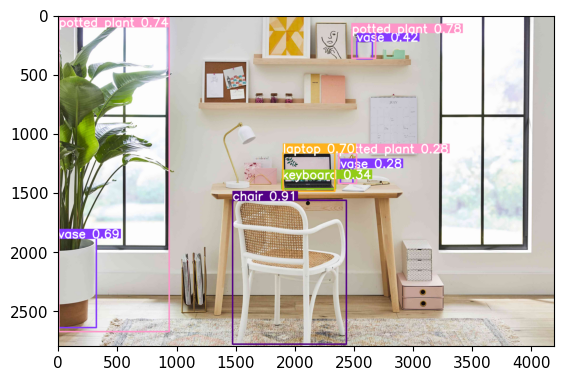

In [27]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [13]:
# Function to open the link in a web browser
def open_link(event):
    # Extract the URL 
    url = event.artist.get_url()
    webbrowser.open(url)

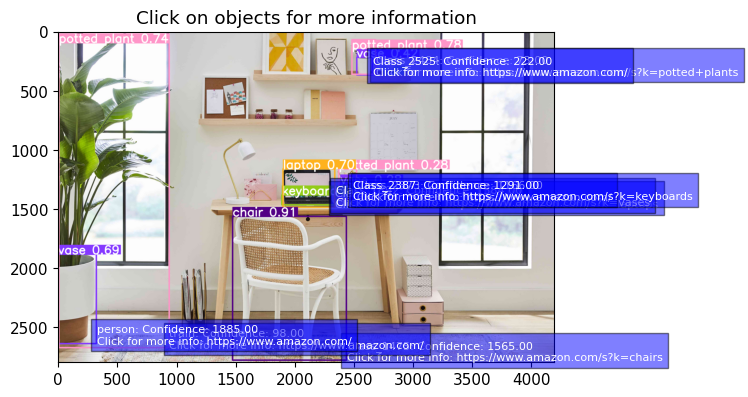

In [26]:
# Function to create annotation text with a clickable link
def create_annotation(class_name, confidence, link):
    return f"{class_name}: Confidence: {confidence:.2f}\nClick for more info: {link}"

def print_with_links(results):
    fig, ax = plt.subplots()
    ax.imshow(np.squeeze(results.render()))

    for obj in results.xyxy[0].numpy():
        class_index, confidence, xmin, ymin, xmax, ymax = map(int, obj[:6])
        class_index = class_index - 1  # Adjust for 0-based indexing in Python
        class_name = model.names[class_index] if class_index < len(model.names) else f"Class_{class_index}"

        link = ''  # Initialize link to None

        if class_name == "Class_1475":
            link = 'https://www.amazon.com/s?k=chairs'
        elif class_name == "Class_2484":
            link = 'https://www.amazon.com/s?k=potted+plants'
        elif class_name == "Class_1901":
            link = 'https://www.amazon.com/s?k=laptops'
        elif class_name == "Class_2387":
            link = 'https://www.amazon.com/s?k=keyboards'
        elif class_name == "Class_1892":
            link = 'https://www.amazon.com/s?k=vases'
        else:
            link = 'https://www.amazon.com/'

        annotation_text = create_annotation(class_name, confidence, link)
        annotation = ax.annotate(annotation_text, xy=(xmin, ymin), xytext=(xmin, ymin), color='white', fontsize=8,
                                bbox=dict(facecolor='blue', alpha=0.5))
    fig.canvas.mpl_connect('button_press_event', open_link)  # Connect click event to the figure

    plt.title("Click on objects for more information")
    plt.show()

# Display image
print_with_links(results)